# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 583


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vorgashor
Processing Record 2 of Set 1 | portland
Processing Record 3 of Set 1 | bahir dar
Processing Record 4 of Set 1 | amarante do maranhao
Processing Record 5 of Set 1 | udachny
Processing Record 6 of Set 1 | taiohae
City not found. Skipping...
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | college
Processing Record 9 of Set 1 | aasiaat
Processing Record 10 of Set 1 | nchelenge
Processing Record 11 of Set 1 | phongsali
Processing Record 12 of Set 1 | saint-philippe
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | iqaluit
Processing Record 15 of Set 1 | susuman
Processing Record 16 of Set 1 | hadibu
Processing Record 17 of Set 1 | puerto natales
Processing Record 18 of Set 1 | adamstown
Processing Record 19 of Set 1 | bilibino
Processing Record 20 of Set 1 | hamilton
Processing Record 21 of Set 1 | bethel
Processing Record 22 of Set 1 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vorgashor,67.5833,63.9500,6.48,76,9,2.30,RU,1723063292
1,portland,45.5234,-122.6762,29.99,46,0,0.45,US,1723063004
2,bahir dar,11.5936,37.3908,15.91,92,100,1.15,ET,1723063295
3,amarante do maranhao,-5.5667,-46.7422,30.90,26,4,1.53,BR,1723063296
4,udachny,66.4167,112.4000,12.61,59,84,4.31,RU,1723063297


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vorgashor,67.5833,63.9500,6.48,76,9,2.30,RU,1723063292
1,portland,45.5234,-122.6762,29.99,46,0,0.45,US,1723063004
2,bahir dar,11.5936,37.3908,15.91,92,100,1.15,ET,1723063295
3,amarante do maranhao,-5.5667,-46.7422,30.90,26,4,1.53,BR,1723063296
4,udachny,66.4167,112.4000,12.61,59,84,4.31,RU,1723063297


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

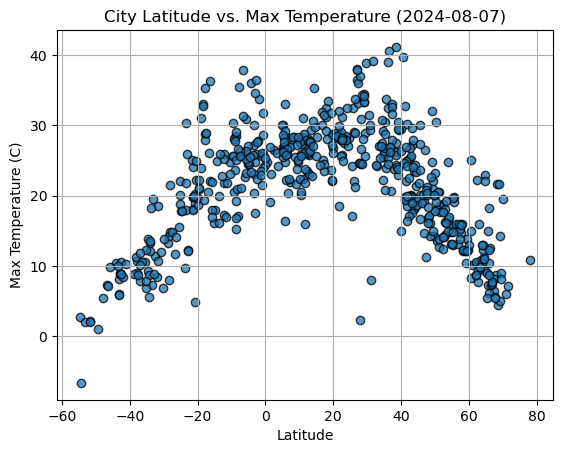

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], alpha=.75, edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature (2024-08-07)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

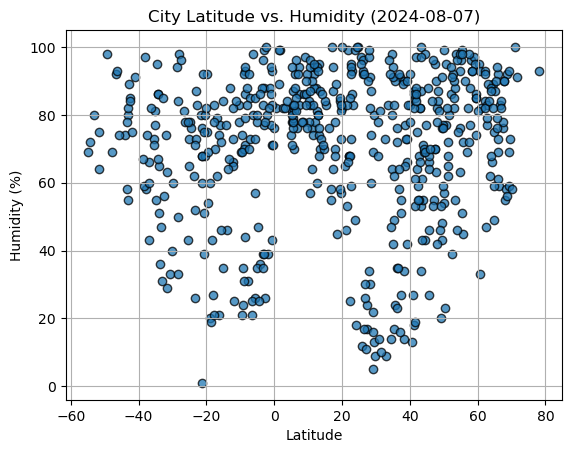

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], alpha=.75, edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2024-08-07)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

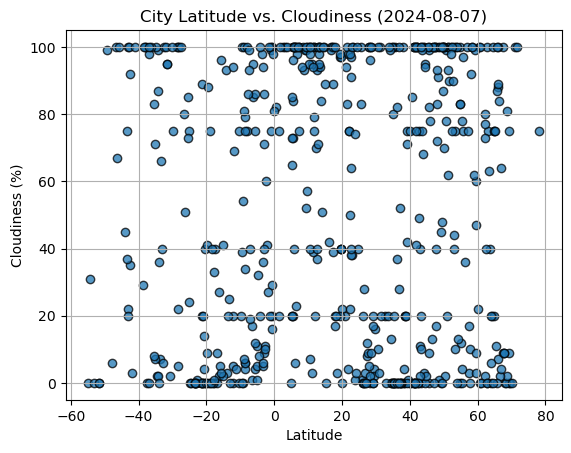

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], alpha=.75, edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2024-08-07)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

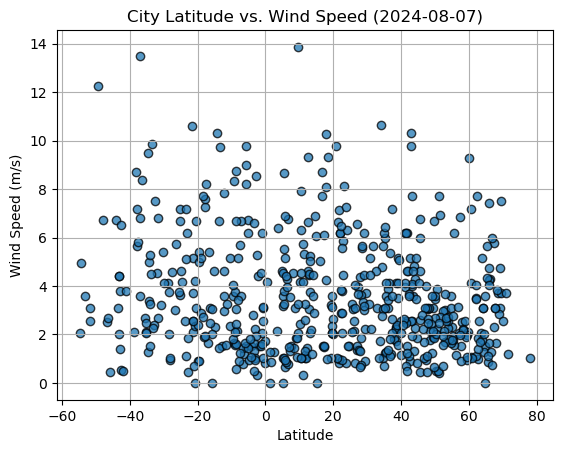

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], alpha=.75, edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2024-08-07)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def linreg_plot(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    f, ax = plt.subplots()
    ax.scatter(x,y)
    ax.plot(x, regress_values, 'red')
    
    return ax, line_eq, rvalue


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vorgashor,67.5833,63.9500,6.48,76,9,2.30,RU,1723063292
1,portland,45.5234,-122.6762,29.99,46,0,0.45,US,1723063004
2,bahir dar,11.5936,37.3908,15.91,92,100,1.15,ET,1723063295
4,udachny,66.4167,112.4000,12.61,59,84,4.31,RU,1723063297
6,college,64.8569,-147.8028,22.99,59,75,1.54,US,1723063300


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat']<=0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,amarante do maranhao,-5.5667,-46.7422,30.90,26,4,1.53,BR,1723063296
5,port-aux-francais,-49.3500,70.2167,1.08,98,99,12.25,TF,1723063299
8,nchelenge,-9.3451,28.7340,20.57,35,54,1.63,ZM,1723063302
10,saint-philippe,-21.3585,55.7679,19.77,76,0,2.12,RE,1723063304
11,bredasdorp,-34.5322,20.0403,9.25,95,2,1.28,ZA,1723063306


###  Temperature vs. Latitude Linear Regression Plot

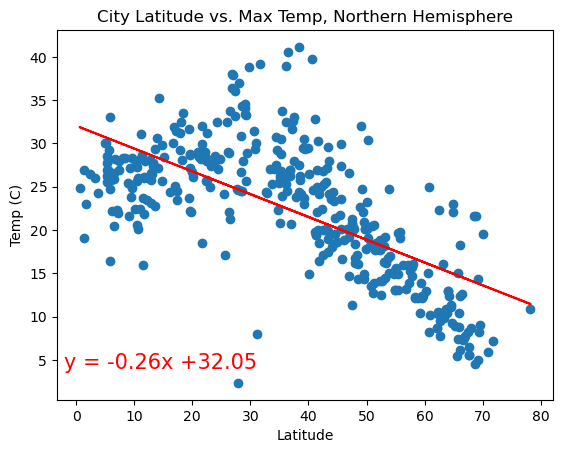

R-value: -0.6701514211170604


In [16]:
# Linear regression on Northern Hemisphere
ax, line_eq, rvalue =linreg_plot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
ax.plot()

plt.title('City Latitude vs. Max Temp, Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Temp (C)')
plt.annotate(line_eq,(-2,4),fontsize=15,color="red")
plt.savefig("output_data/Fig5.png")
plt.show()

print(f"R-value: {rvalue}")

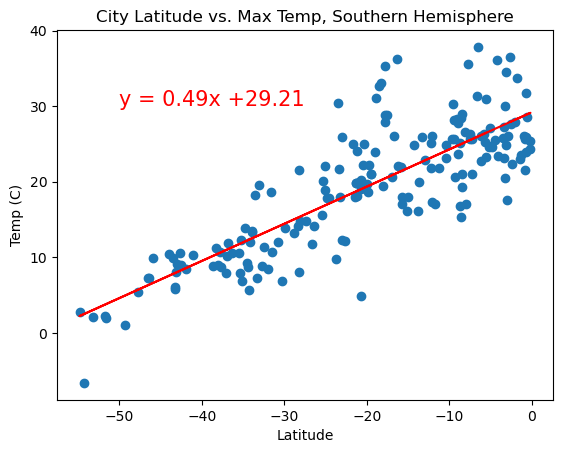

R-value: 0.8276412230617957


In [17]:
# Linear regression on Southern Hemisphere
ax, line_eq, rvalue =linreg_plot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
ax.plot()
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.title('City Latitude vs. Max Temp, Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Temp (C)')
plt.savefig("output_data/Fig6.png")
plt.show()
print(f"R-value: {rvalue}")

**Discussion about the linear relationship:** The relationship between latitude and temperature is much stronger in the northern than southern hemishpere, as seen in the tightness of the scatterplot points and will as the R squared values. However the trend is the same for both; the further from the equator, the colder the temperature.

### Humidity vs. Latitude Linear Regression Plot

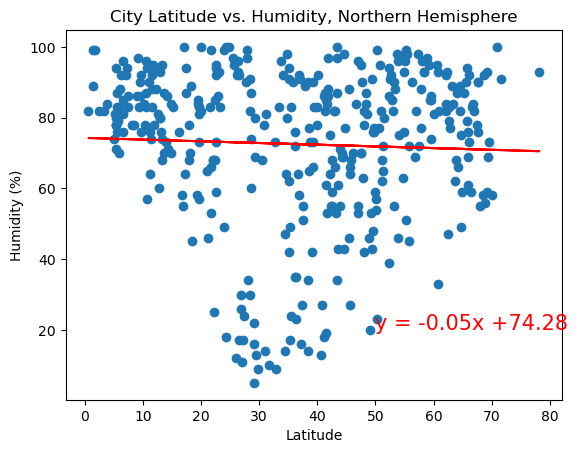

R-value: -0.04184176288488516


In [18]:
# Northern Hemisphere
ax, line_eq, rvalue =linreg_plot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
ax.plot()
plt.annotate(line_eq,(50,20),fontsize=15,color="red")
plt.title('City Latitude vs. Humidity, Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig("output_data/Fig7.png")
plt.show()
print(f"R-value: {rvalue}")

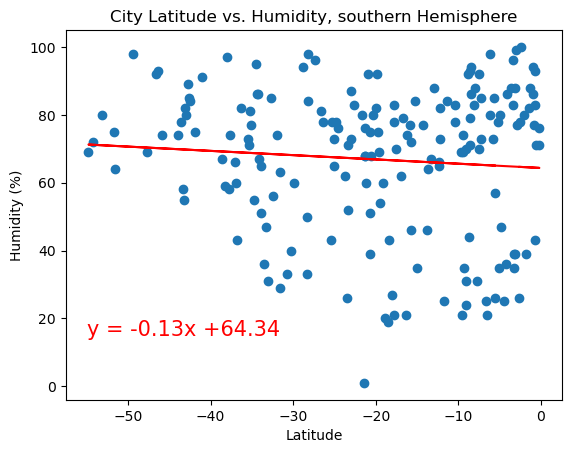

R-value: -0.08311489627262754


In [19]:
# Southern Hemisphere
ax, line_eq, rvalue =linreg_plot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
ax.plot()
plt.annotate(line_eq,(-55,15),fontsize=15,color="red")
plt.title('City Latitude vs. Humidity, southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig("output_data/Fig8.png")
plt.show()
print(f"R-value: {rvalue}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

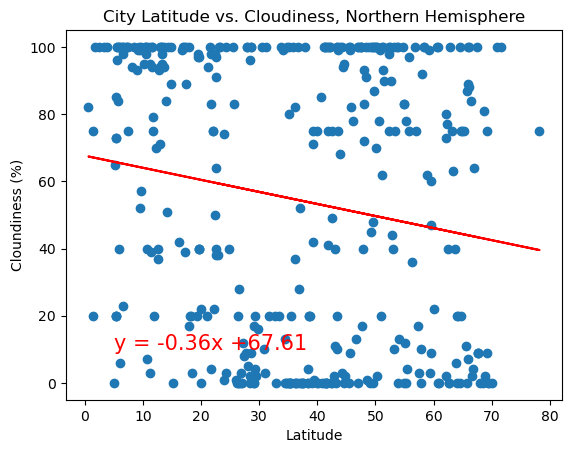

R-value: -0.16806528890354488


In [20]:
# Northern Hemisphere
ax, line_eq, rvalue =linreg_plot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
ax.plot()
plt.annotate(line_eq,(5,10),fontsize=15,color="red")
plt.title('City Latitude vs. Cloudiness, Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloundiness (%)')
plt.savefig("output_data/Fig9.png")
plt.show()
print(f"R-value: {rvalue}")

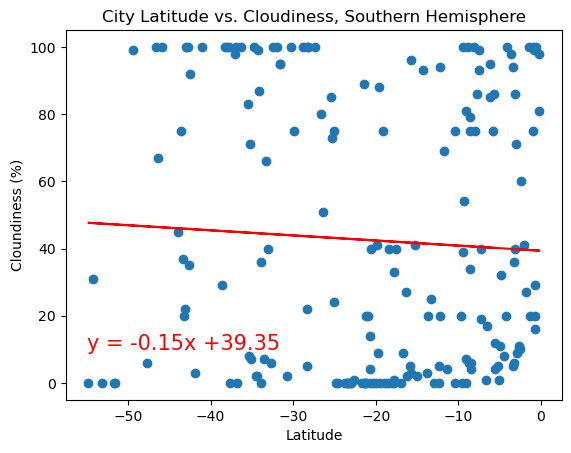

R-value: -0.054720710654918354


In [21]:
# Southern Hemisphere
ax, line_eq, rvalue =linreg_plot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
ax.plot()
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")
plt.title('City Latitude vs. Cloudiness, Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloundiness (%)')
plt.savefig("output_data/Fig10.png")
plt.show()
print(f"R-value: {rvalue}")

**Discussion about the linear relationship:** The relationship between latitude and cloud cover is not very strong, but it is surprisingly similar for both hemishperes. The regressions indicate a one degree latitude change is related to roughly 0.5% change in cloud cover on average.

### Wind Speed vs. Latitude Linear Regression Plot

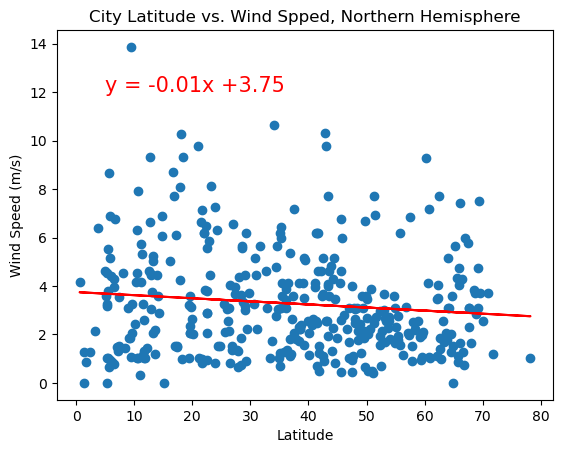

R-value: -0.11320340045590903


In [22]:
# Northern Hemisphere
ax, line_eq, rvalue =linreg_plot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
ax.plot()
plt.annotate(line_eq,(5,12),fontsize=15,color="red")
plt.title('City Latitude vs. Wind Spped, Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.savefig("output_data/Fig11.png")
plt.show()
print(f"R-value: {rvalue}")

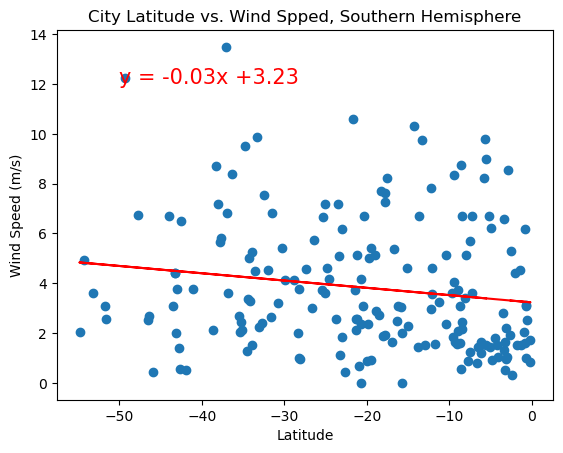

R-value: -0.1583876232644643


In [23]:
# Southern Hemisphere
ax, line_eq, rvalue =linreg_plot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
ax.plot()
plt.annotate(line_eq,(-50,12),fontsize=15,color="red")
plt.title('City Latitude vs. Wind Spped, Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.savefig("output_data/Fig12.png")
plt.show()
print(f"R-value: {rvalue}")

**Discussion about the linear relationship:** There is essentially no (linear) relationship between latitude and wind speed. For both hemisphere the slope coefficients and r-values are near zero.